In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"bank-additional.csv",sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


### Basic EDA on data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [4]:
df.shape

(4119, 21)

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

-  there are 4119 rows are there and 21 columns are there 
- dtypes: float64(5), int64(5), object(11)

### Checking missing values

In [6]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

-  There is no missing values are there 

### Step 4: Convert Categorical Columns


In [7]:
cols = df.select_dtypes(include="object").columns
cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [8]:
df.select_dtypes(include="object")

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,nonexistent,no
1,services,single,high.school,no,no,no,telephone,may,fri,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,jun,wed,nonexistent,no
3,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,nonexistent,no
4,admin.,married,university.degree,no,yes,no,cellular,nov,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
4114,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,nonexistent,no
4115,admin.,married,high.school,no,yes,no,telephone,jul,fri,nonexistent,no
4116,student,single,high.school,no,no,no,cellular,may,mon,failure,no
4117,admin.,married,high.school,no,no,no,cellular,aug,fri,nonexistent,no


In [9]:
for i in cols:
    print(i,df[i].unique())

job ['blue-collar' 'services' 'admin.' 'entrepreneur' 'self-employed'
 'technician' 'management' 'student' 'retired' 'housemaid' 'unemployed'
 'unknown']
marital ['married' 'single' 'divorced' 'unknown']
education ['basic.9y' 'high.school' 'university.degree' 'professional.course'
 'basic.6y' 'basic.4y' 'unknown' 'illiterate']
default ['no' 'unknown' 'yes']
housing ['yes' 'no' 'unknown']
loan ['no' 'unknown' 'yes']
contact ['cellular' 'telephone']
month ['may' 'jun' 'nov' 'sep' 'jul' 'aug' 'mar' 'oct' 'apr' 'dec']
day_of_week ['fri' 'wed' 'mon' 'thu' 'tue']
poutcome ['nonexistent' 'failure' 'success']
y ['no' 'yes']


In [10]:
for i in cols:
    print(i,df[i].nunique())

job 12
marital 4
education 8
default 3
housing 3
loan 3
contact 2
month 10
day_of_week 5
poutcome 3
y 2


In [11]:
for i in cols:
    print(i,df[i].value_counts())

job job
admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: count, dtype: int64
marital marital
married     2509
single      1153
divorced     446
unknown       11
Name: count, dtype: int64
education education
university.degree      1264
high.school             921
basic.9y                574
professional.course     535
basic.4y                429
basic.6y                228
unknown                 167
illiterate                1
Name: count, dtype: int64
default default
no         3315
unknown     803
yes           1
Name: count, dtype: int64
housing housing
yes        2175
no         1839
unknown     105
Name: count, dtype: int64
loan loan
no         3349
yes         665
unknown     105
Name: count, dtype: int64
contact contact
cellular     2652
telephone    1467
Name: 

- there are the count of unique values of each columns

### Visualization:


In [12]:
df["marital"].value_counts()

marital
married     2509
single      1153
divorced     446
unknown       11
Name: count, dtype: int64

In [13]:
# plt.figure(figsize=(10,3))
# plt.hist(df["marital"])
# plt.show()

In [14]:
# marital= df["marital"]
# counts = df["marital"].value_counts()
# # job_df = pd.DataFrame(marital,counts)
# job_df


In [15]:
# job_df = pd.DataFrame(df["job"])
category_counts = df["job"].value_counts()
print(category_counts.index,category_counts)


Index(['admin.', 'blue-collar', 'technician', 'services', 'management',
       'retired', 'self-employed', 'entrepreneur', 'unemployed', 'housemaid',
       'student', 'unknown'],
      dtype='object', name='job') job
admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: count, dtype: int64


In [16]:
# plt.bar(category_counts.index,category_counts.values)
# plt.show()

In [17]:
# # job_df = pd.DataFrame(df["job"])
# plt.figure(figsize=(15, 30))


# for i in cols:
#     category_counts = df[i].value_counts()
#     plt.bar(category_counts.index,category_counts)
#     # print(category_counts.index,category_counts)
#     for j in range(1,12):
#         plt.subplot(6,2,j)
#         # plt.xlabel(category_counts.index)
#         plt.ylabel('Count')
#         plt.xticks(rotation=45)
# plt.show()


In [18]:
# plt.figure(figsize=(15, 30))

# for idx, col in enumerate(cols, start=1):
#     plt.subplot(6, 2, idx)
#     category_counts = df[col].value_counts()
#     plt.bar(category_counts.index, category_counts.values)
#     plt.xlabel(col)
#     plt.ylabel('Count')
#     plt.xticks(rotation=45)

# plt.tight_layout()
# plt.show()

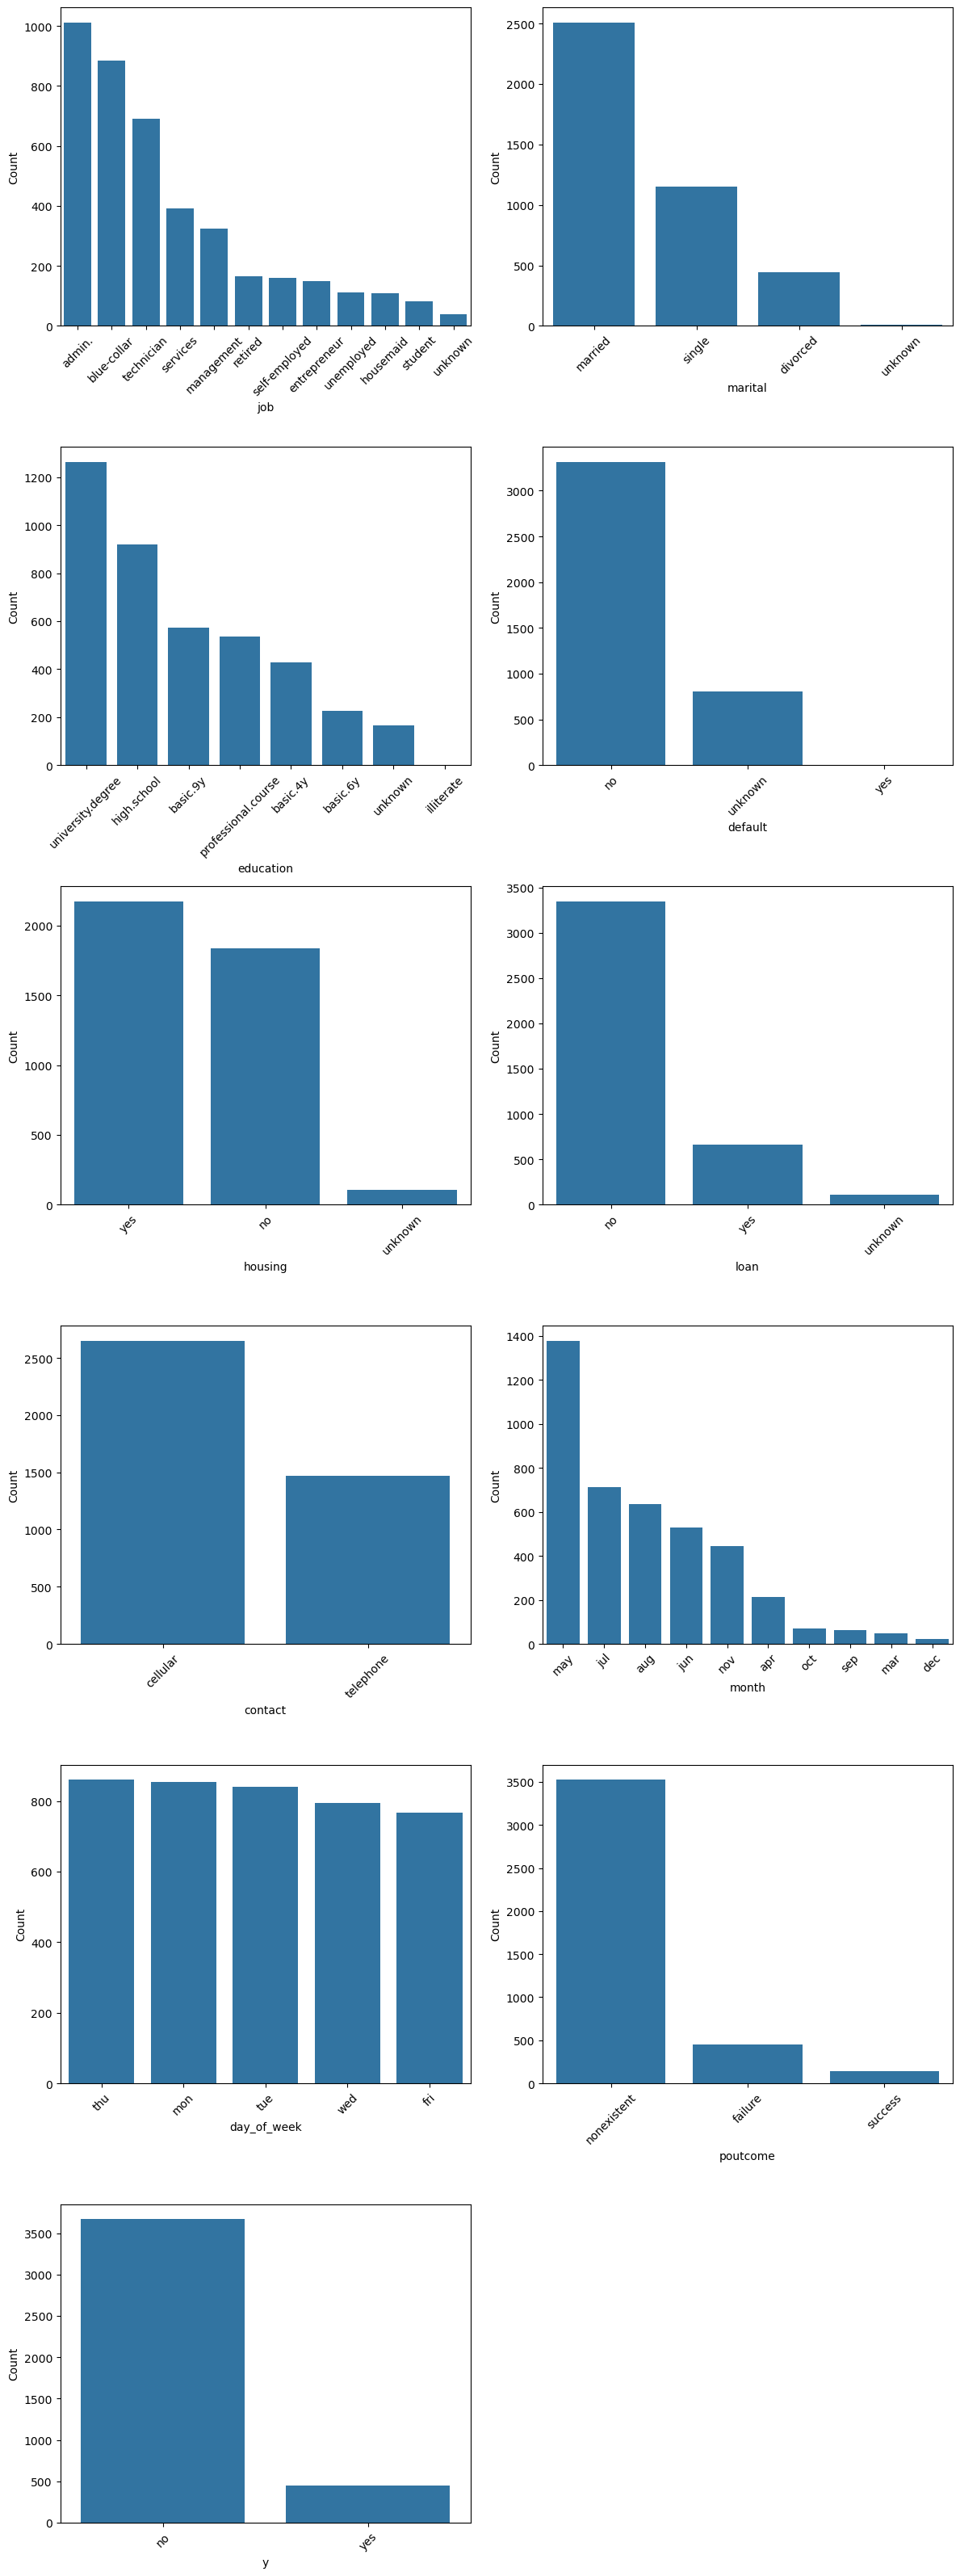

In [19]:
plt.figure(figsize=(12, 32))

for idx, col in enumerate(cols, start=1):
    plt.subplot(6, 2, idx)
    category_counts = df[col].value_counts()
    sns.countplot(df,x=col,order=category_counts.keys())
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

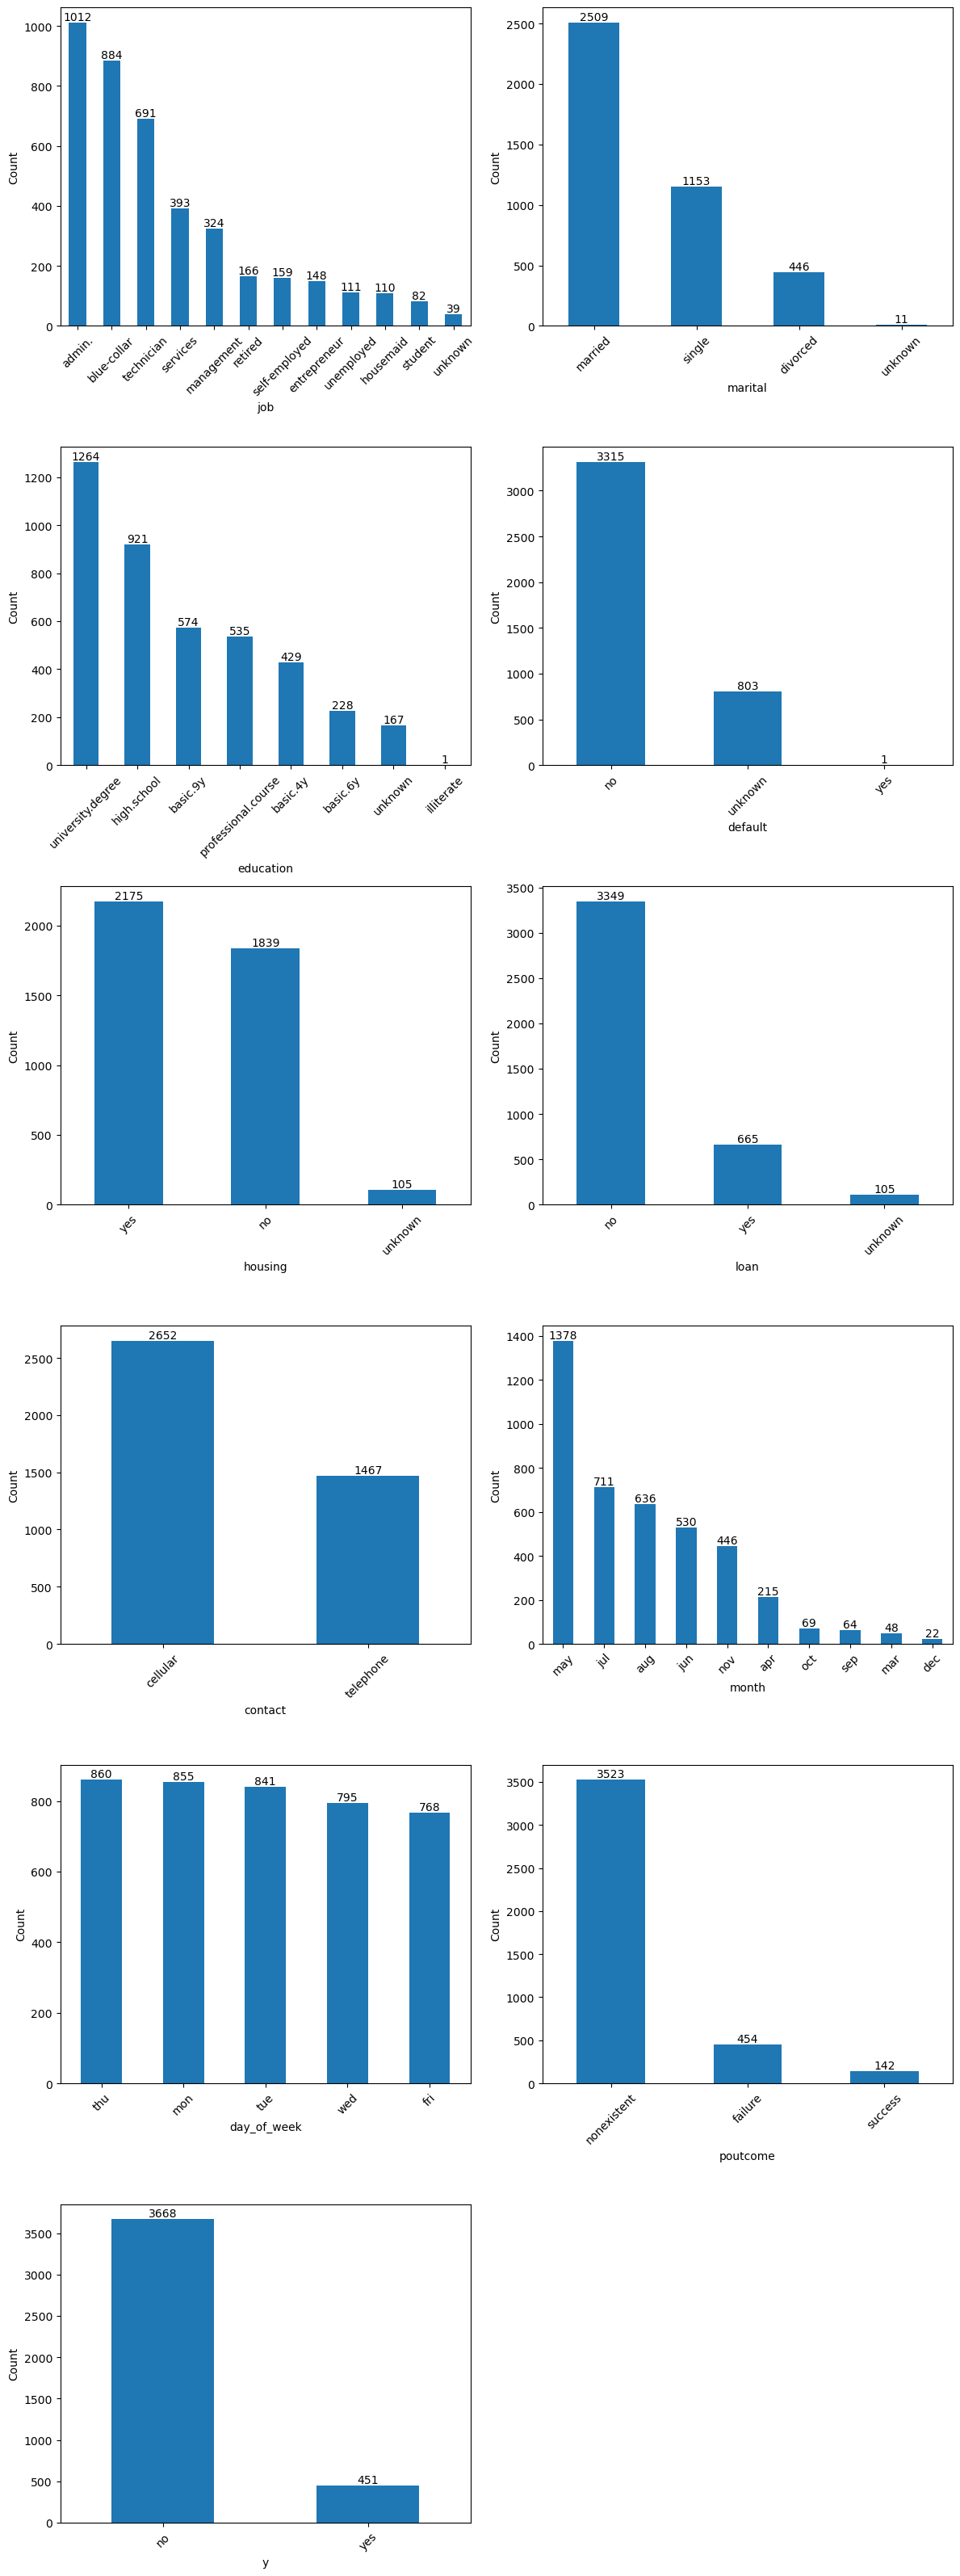

In [20]:
plt.figure(figsize=(12, 32))

for idx, col in enumerate(cols, start=1):
    plt.subplot(6, 2, idx)
    category_counts = df[col].value_counts()
    ax= category_counts.plot(kind="bar")
    ax.bar_label(ax.containers[0])
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

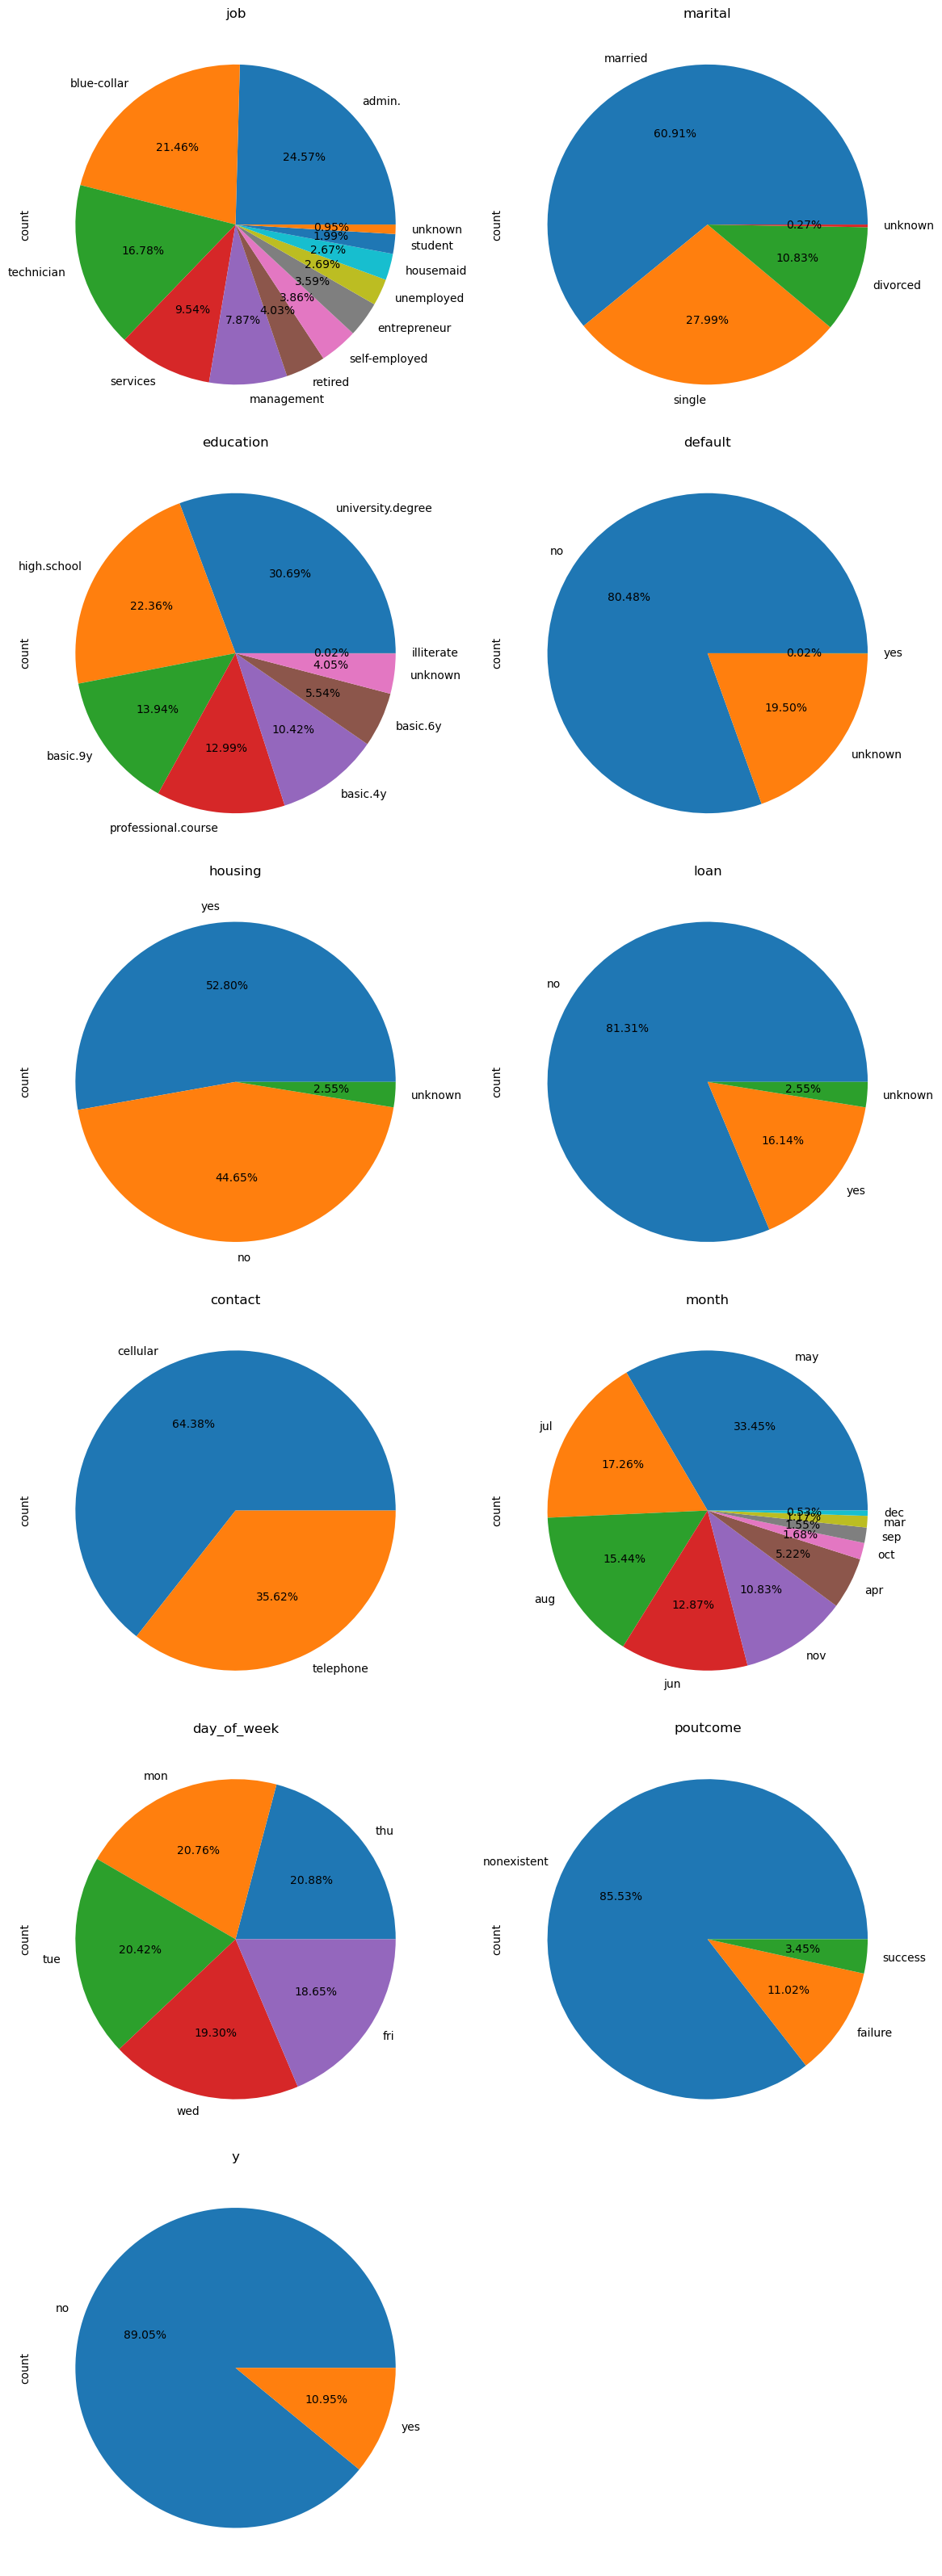

In [21]:
plt.figure(figsize=(12, 32))

for idx, col in enumerate(cols,1):
    plt.subplot(6, 2, idx)
    df[col].value_counts().plot(kind="pie",autopct="%0.2f%%",radius= 1)
    plt.title(col)

plt.tight_layout()
plt.show()

#### Crosss Tab 

In [22]:
con1 = df["housing"]
# con2 = df["marital"]
con3 = df ["loan"]
con4 = df["y"]

In [23]:
con = [con3,con1]
pd.crosstab(con,con4)

y                  no  yes
loan    housing           
no      no       1406  178
        yes      1569  196
unknown unknown    96    9
yes     no        231   24
        yes       366   44

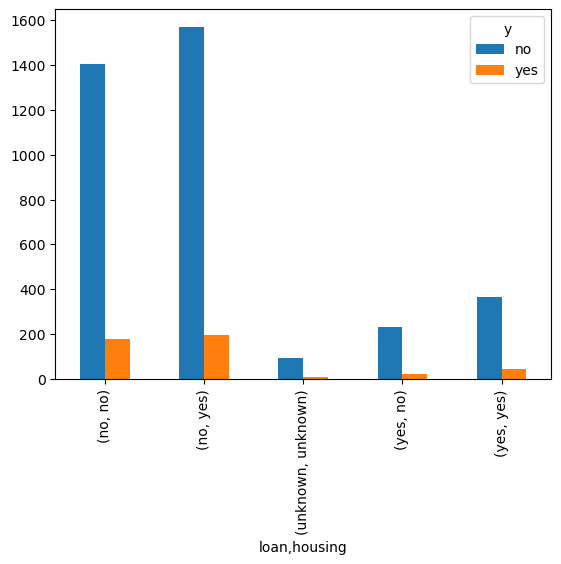

In [24]:
cor = pd.crosstab(con,con4)
cor.plot(kind="bar")
plt.show()

### Analyze and visualize numerical data.

In [25]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [26]:
num_col = df.select_dtypes(exclude="object").columns
num_col

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [27]:
# plt.hist(df["age"],bins=40)
# plt.show()

In [28]:
# plt.figure(figsize=(5,4))
# df["campaign"].plot(kind="hist")

In [29]:
# plt.figure(figsize=(15,30))
# for index,col in enumerate(num_col,1):
#     plt.subplot(5,2,index)
#     plt.hist(df[col],bins=10)
#     plt.title(col)
#     plt.xlabel("class Interval")
#     plt.ylabel("counts")

# plt.tight_layout()
# plt.show()

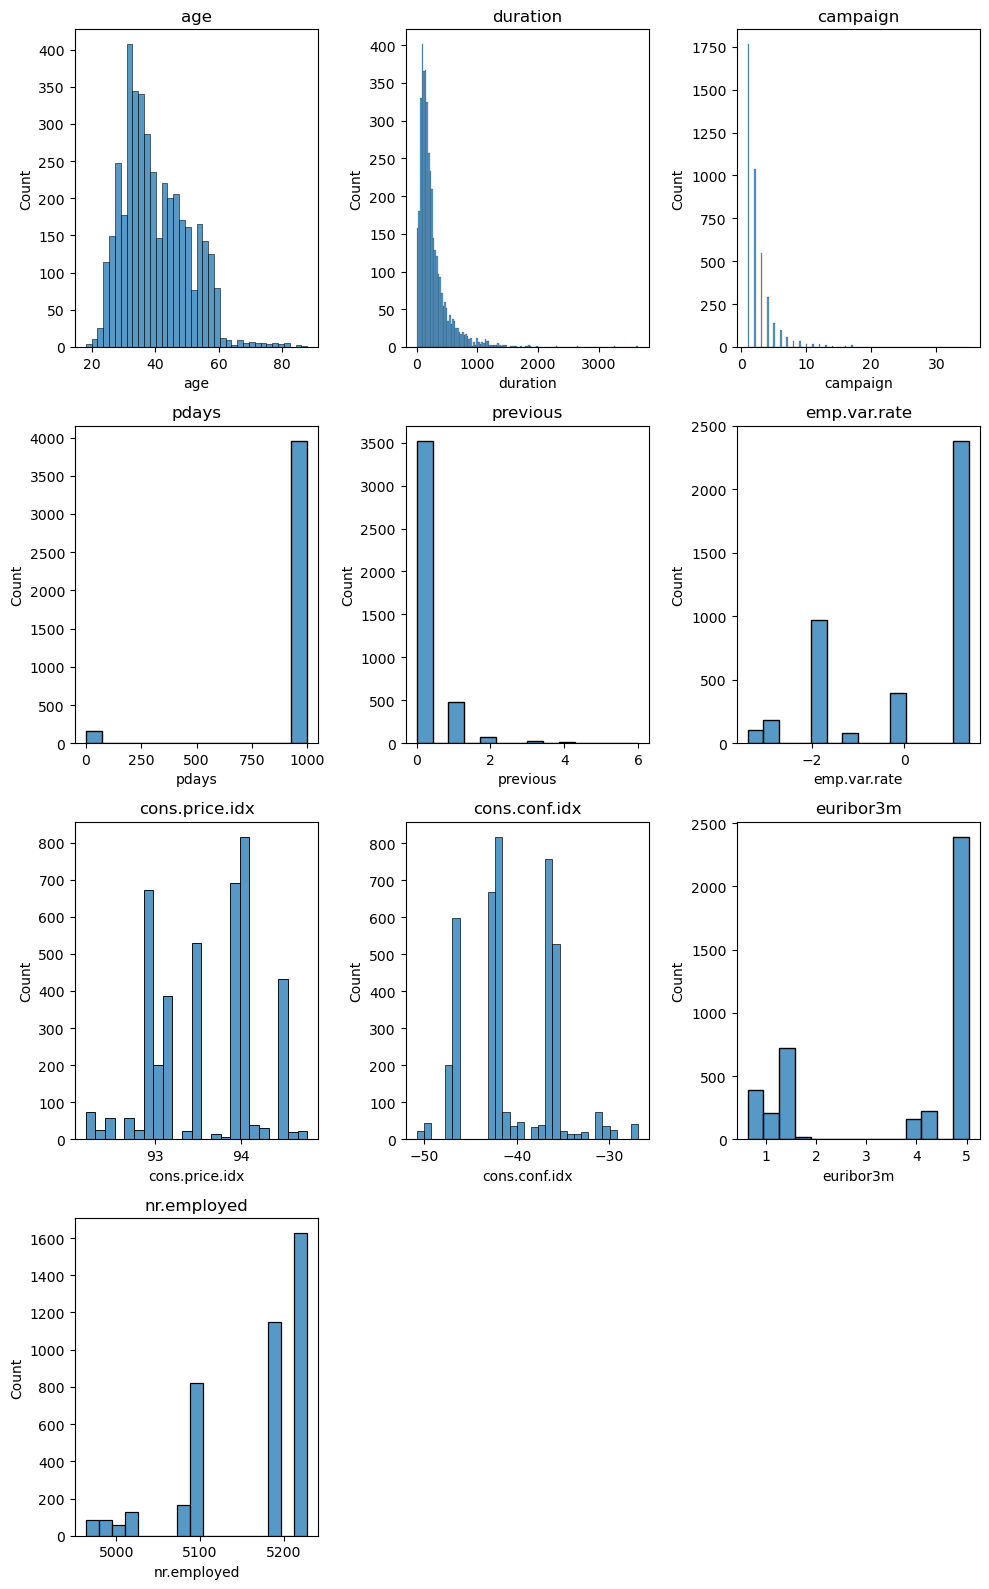

In [30]:
plt.figure(figsize=(10,16))
for index,names in enumerate(num_col,1):
    plt.subplot(4,3,index)
    sns.histplot(df[names])
    plt.title(names)

plt.tight_layout()
plt.show()

In [31]:
# sns.histplot(df["campaign"])

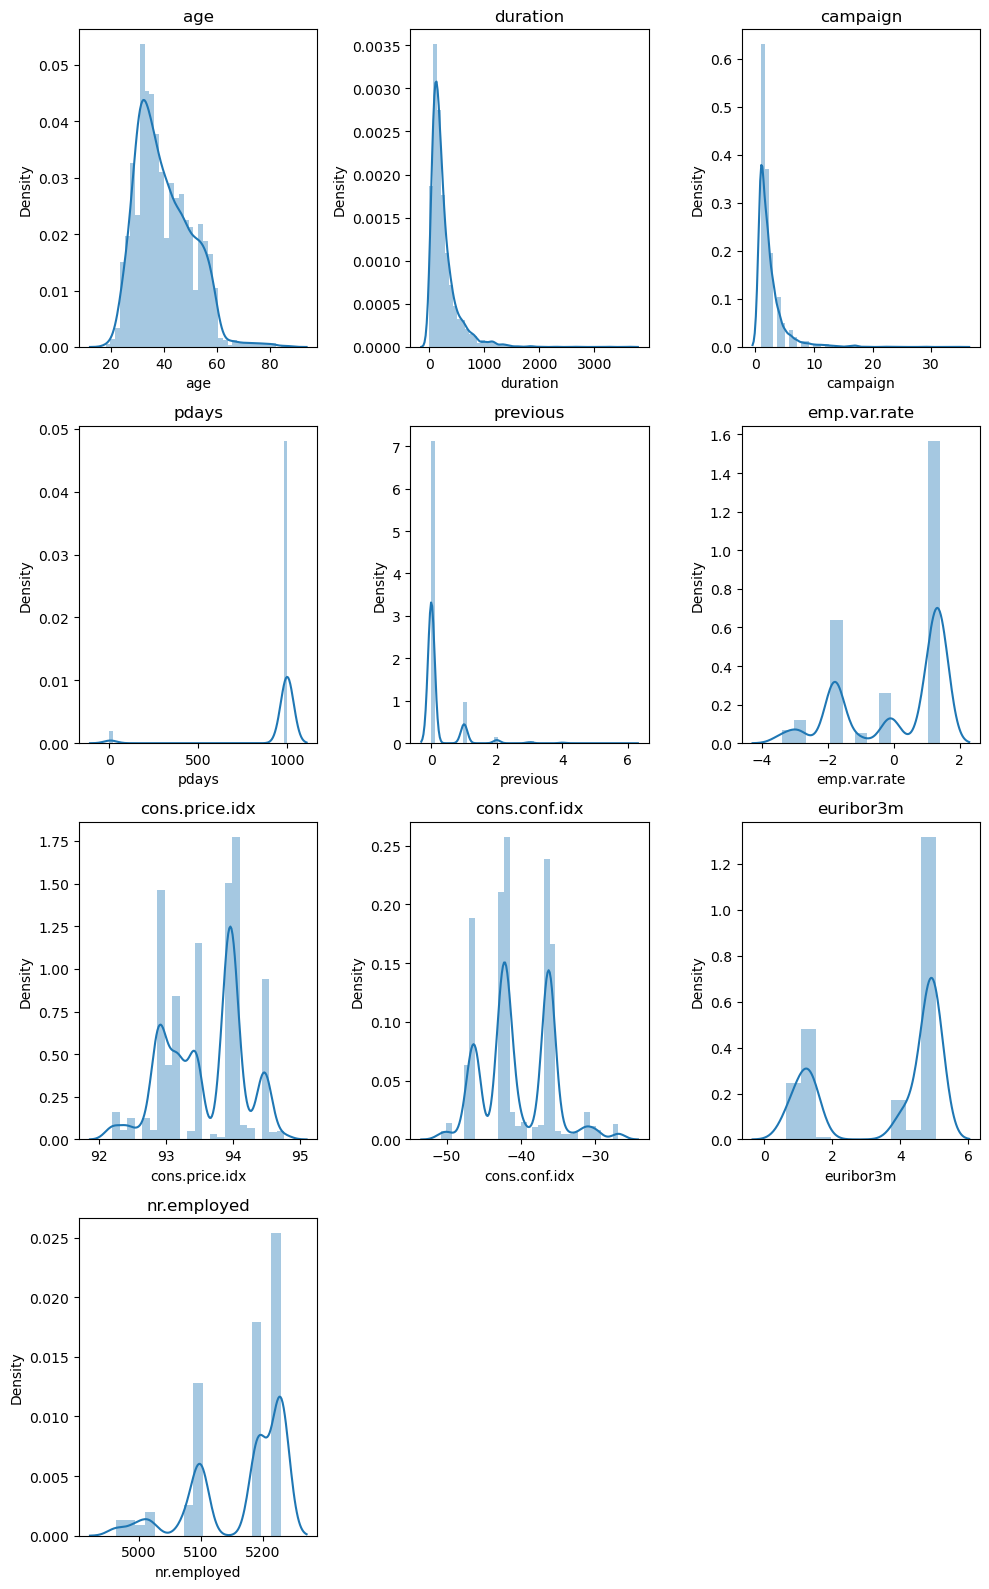

In [32]:
plt.figure(figsize=(10,16))
for index,names in enumerate(num_col,1):
    plt.subplot(4,3,index)
    sns.distplot(df[names])
    plt.title(names)

plt.tight_layout()
plt.show()

In [33]:
for i in num_col:
    print(i,round(df[i].skew(),2))

age 0.72
duration 3.29
campaign 4.0
pdays -4.78
previous 4.02
emp.var.rate -0.73
cons.price.idx -0.22
cons.conf.idx 0.29
euribor3m -0.72
nr.employed -1.08


### Outlairs analysis 

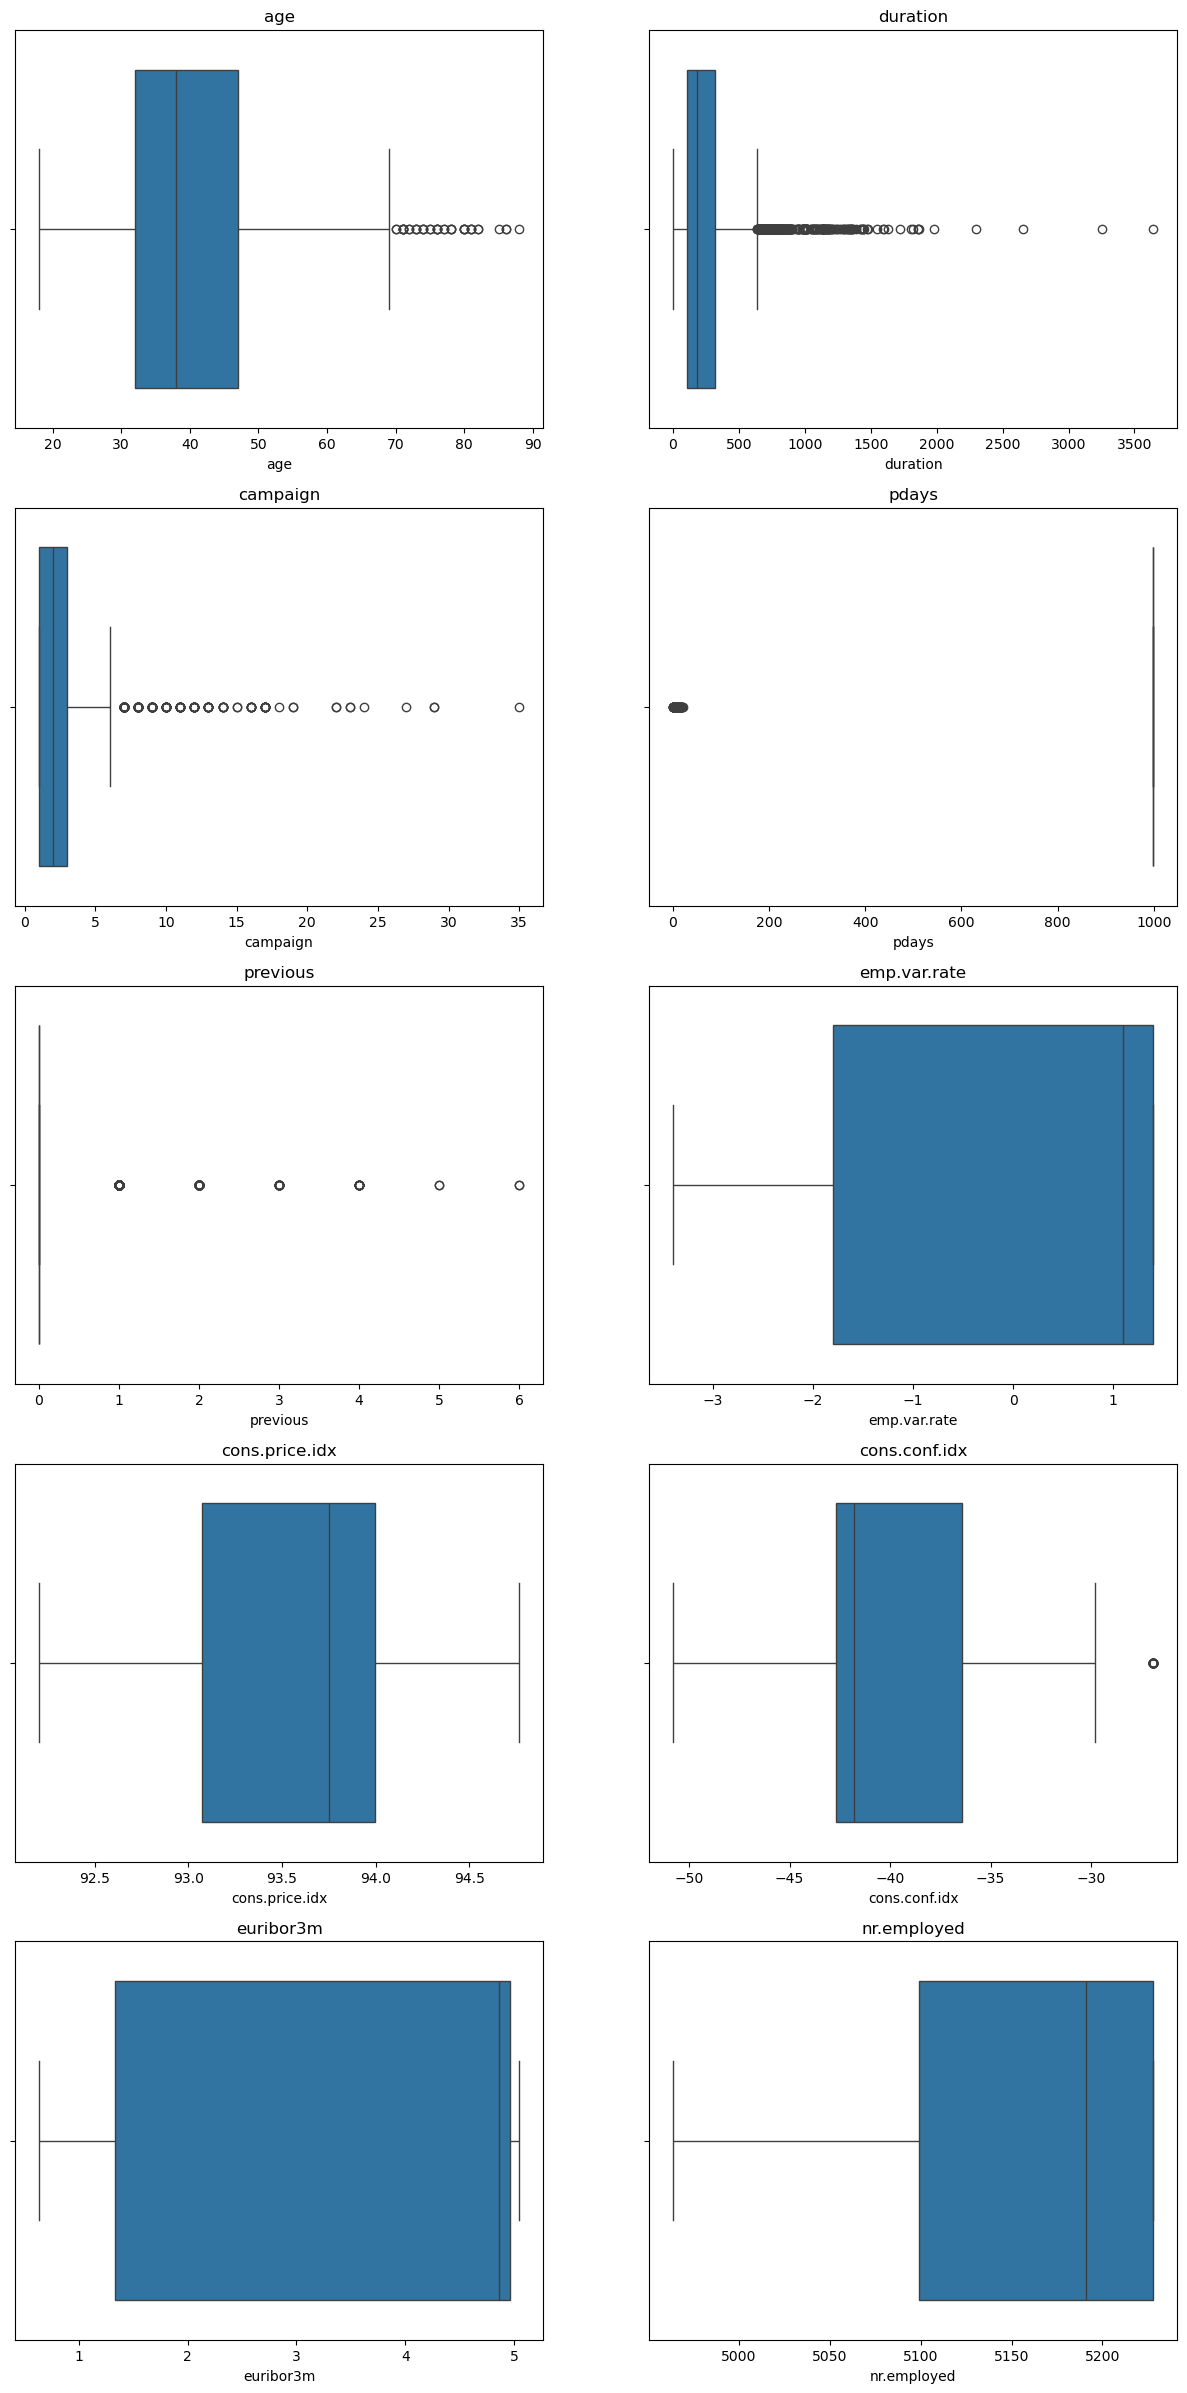

In [34]:
plt.figure(figsize=(15,30))
for index,cols in enumerate( num_col,1):
    plt.subplot(5,2,index)
    sns.boxplot(df[cols],orient="h")
    plt.title(cols)

plt.show()

### Transformation of data 

### Identfy outlairs and replace with median values

In [35]:
df_copy = df.copy()
for i in num_col: 
    q1 = np.percentile(df[i],25)
    q3 = np.percentile(df[i],75)
    # print(q1,q3)

    iqr = q3-q1
    # print(iqr)

    lb=  q1-1.5*iqr
    ub = q3+1.5*iqr

    # print(lb,ub)

    con1 = df[i]<lb
    con2 = df[i]>ub

    outlairs = df[con1 | con2]
    # print(len(outlairs))

    con = con1 | con2
    median = df[i].median()
    new = np.where(con,median,df[i])

    df_copy[i] = new

##### Check the skewness of data after replaceing outlairs with median values

In [36]:
for i in num_col:
    original = round(df[i].skew(),2)
    after = round(df_copy[i].skew(),2)
    print(f"Skewnewss original:{original} after Median:{after}")

Skewnewss original:0.72 after Median:0.44
Skewnewss original:3.29 after Median:1.1
Skewnewss original:4.0 after Median:1.33
Skewnewss original:-4.78 after Median:0.0
Skewnewss original:4.02 after Median:0.0
Skewnewss original:-0.73 after Median:-0.73
Skewnewss original:-0.22 after Median:-0.22
Skewnewss original:0.29 after Median:0.13
Skewnewss original:-0.72 after Median:-0.72
Skewnewss original:-1.08 after Median:-1.08


In [37]:
df_copy.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [38]:
df_copy.describe()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.0,4119.0,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,39.746540,201.982763,2.045885,999.0,0.0,0.084972,93.579704,-40.654649,3.621356,5166.481695
std,9.660751,135.155498,1.239852,0.0,0.0,1.563114,0.579349,4.378644,1.733591,73.667904
min,18.000000,0.000000,1.000000,999.0,0.0,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.0,0.0,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.0,0.0,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,262.000000,3.000000,999.0,0.0,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,69.000000,638.000000,6.000000,999.0,0.0,1.400000,94.767000,-29.800000,5.045000,5228.100000


##### plot the skewness of data after replaceing outlairs with median values 

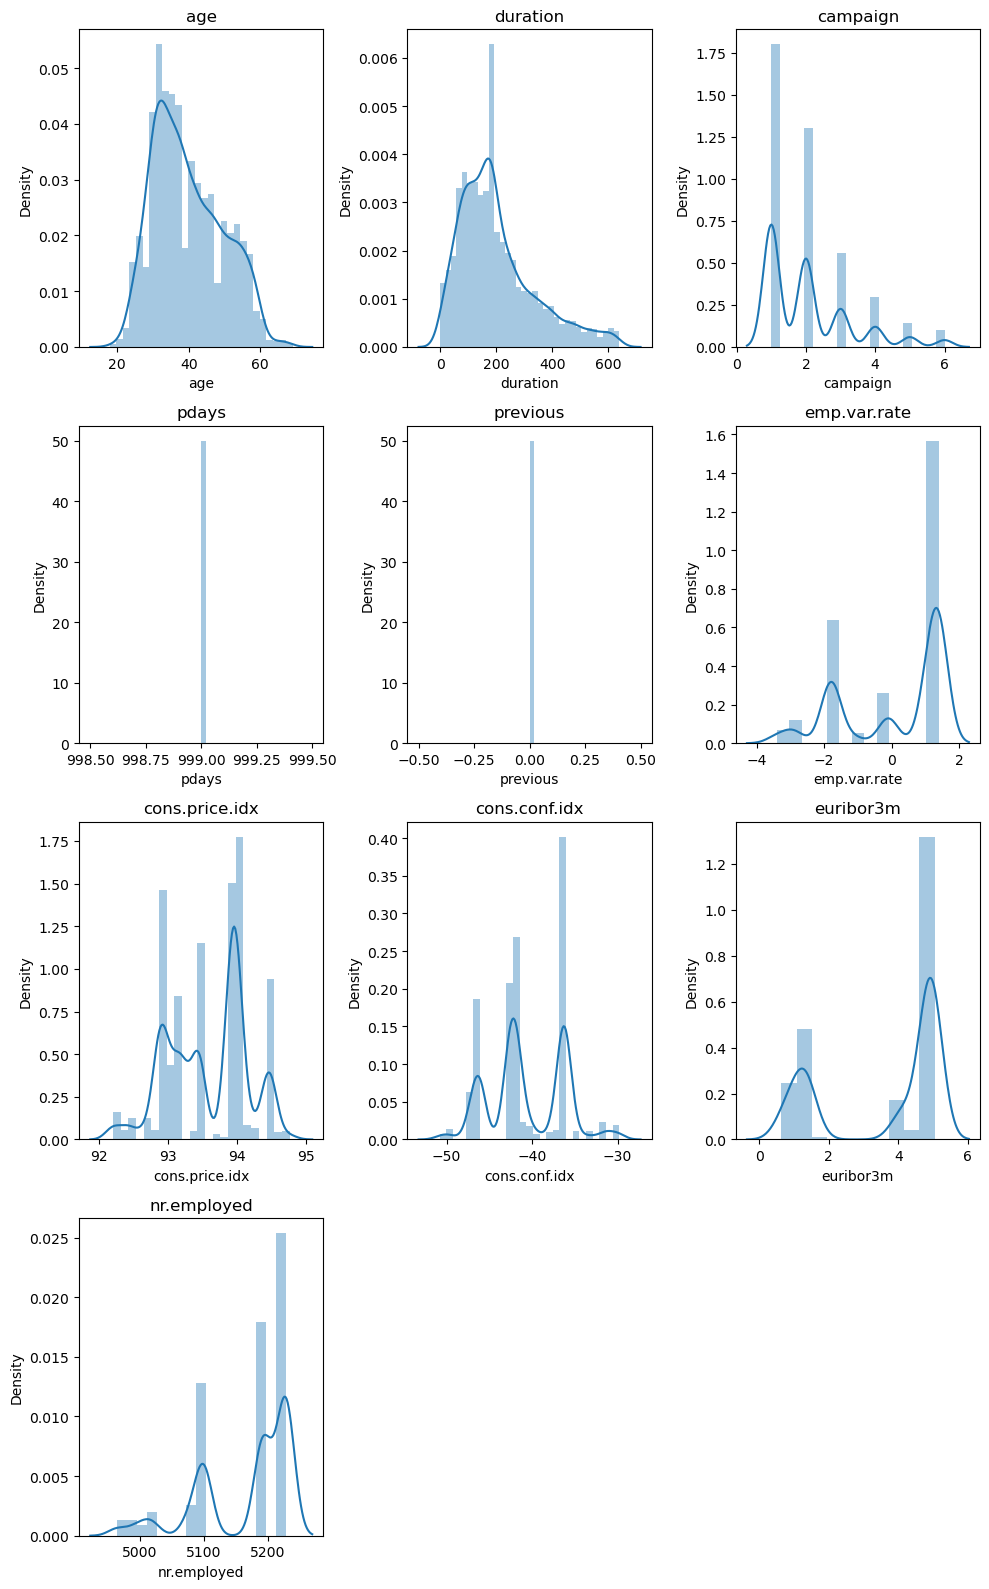

In [39]:
plt.figure(figsize=(10,16))
for index,names in enumerate(num_col,1):
    plt.subplot(4,3,index)
    sns.distplot(df_copy[names])
    plt.title(names)

plt.tight_layout()
plt.show()

##### plot the boxplot of data after replaceing outlairs with median values 

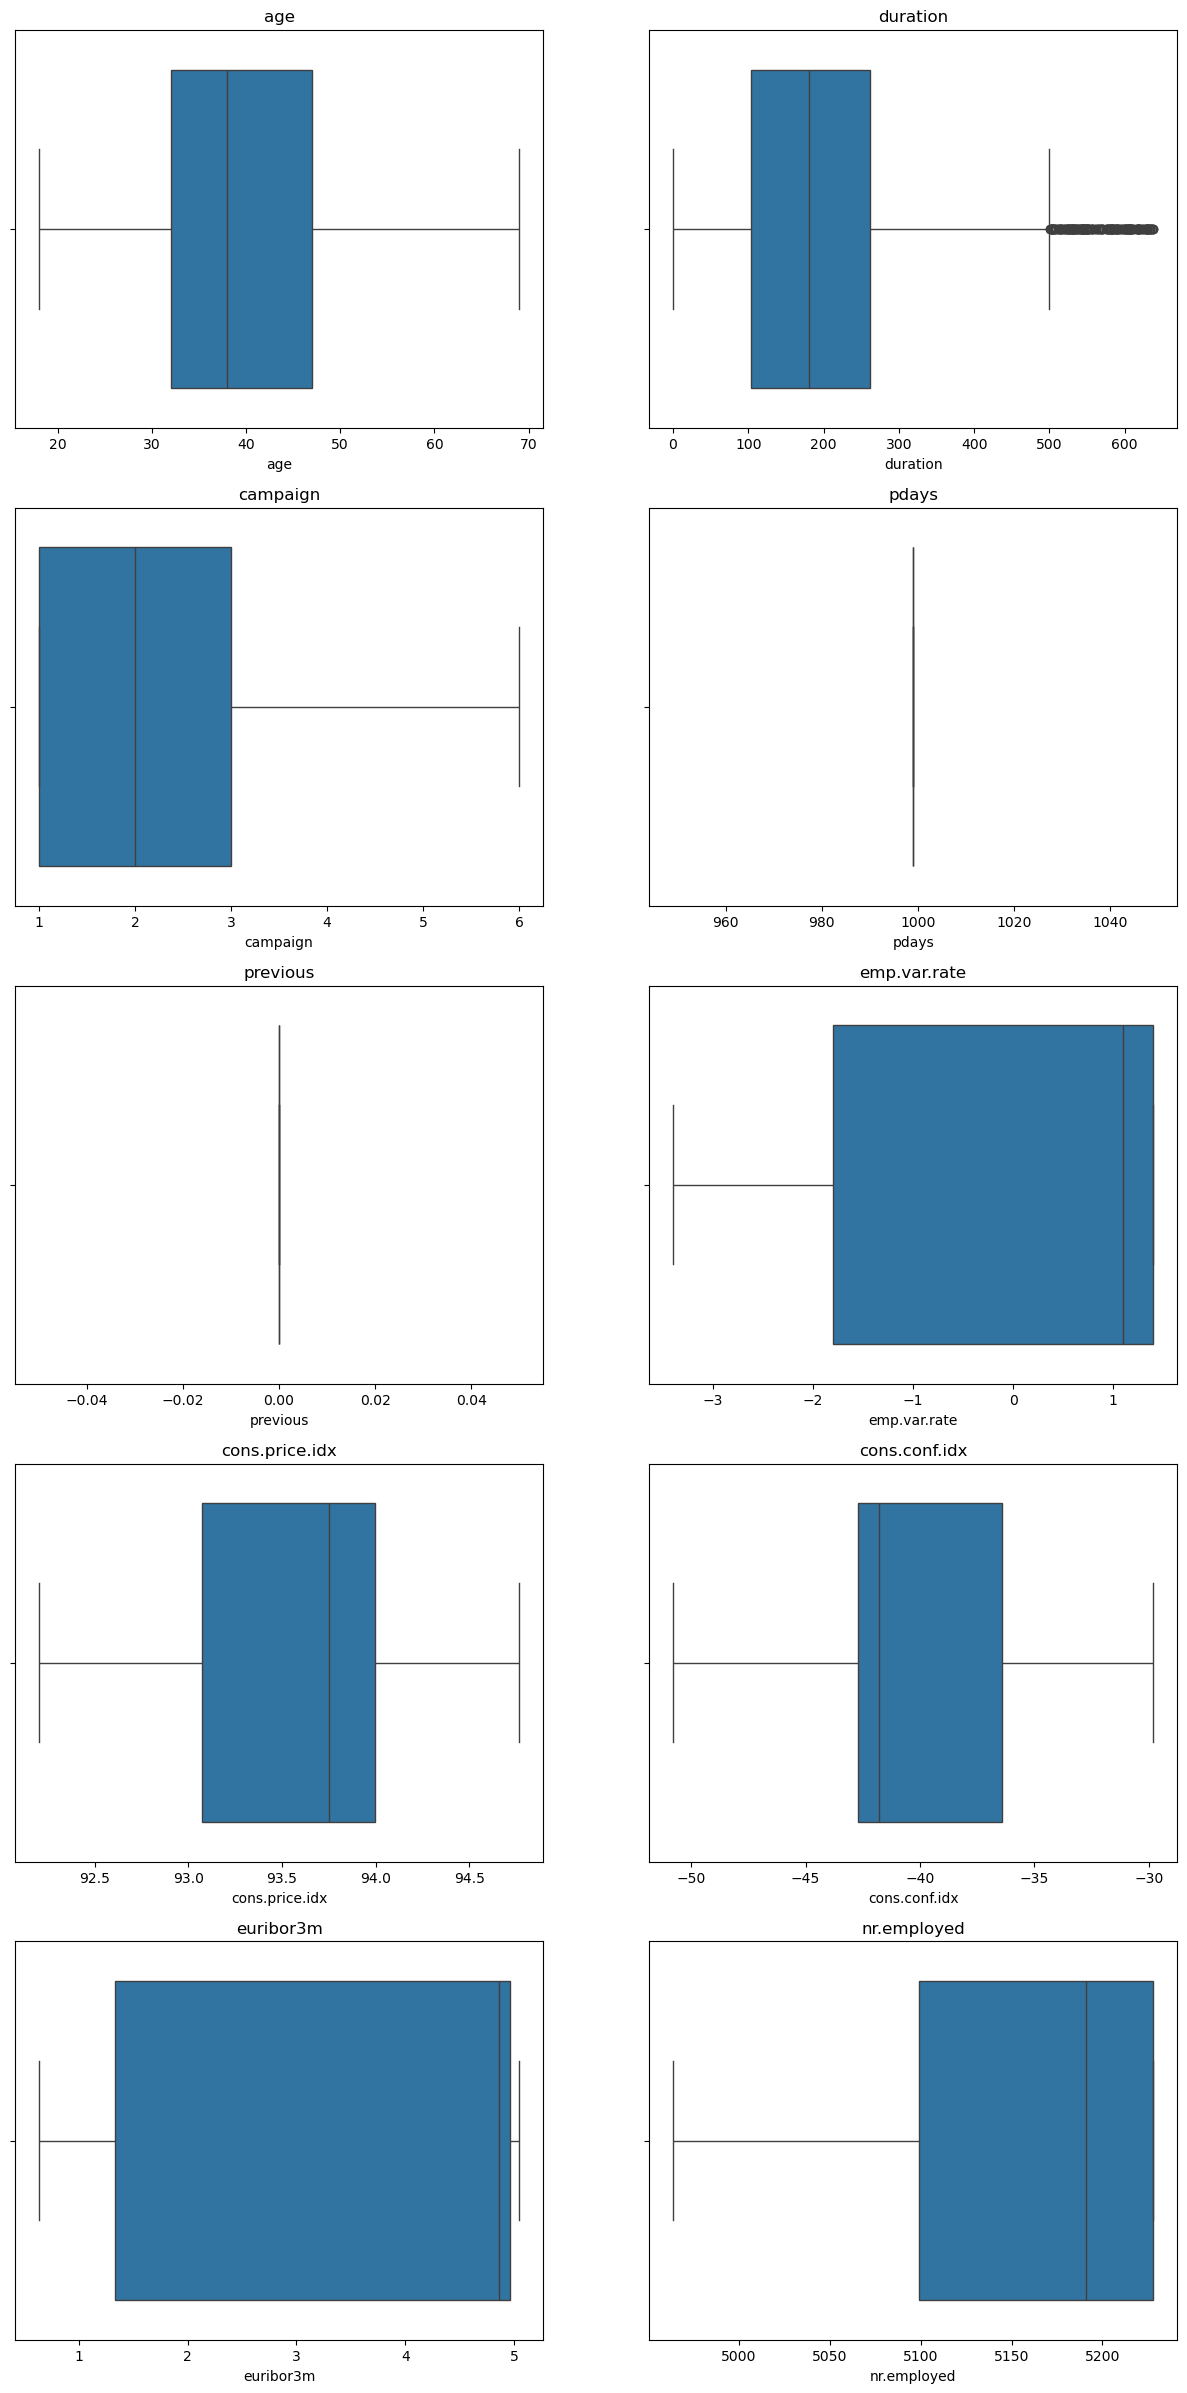

In [40]:
plt.figure(figsize=(15,30))
for index,cols in enumerate( num_col,1):
    plt.subplot(5,2,index)
    sns.boxplot(df_copy[cols],orient="h")
    plt.title(cols)

plt.show()

### we have tranformation technique
    - log tranformation
    - exponetinal transformation
    - reciprocal transformation
    - sqaure root transformtion
    - power transformation
        - box cox 
        - Yeo jhon osn

In [41]:
cat_cols = df_copy.select_dtypes(exclude="object").columns
cat_cols



Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

### log tranformation
 - we can only use log tranformation on posetive values like age 


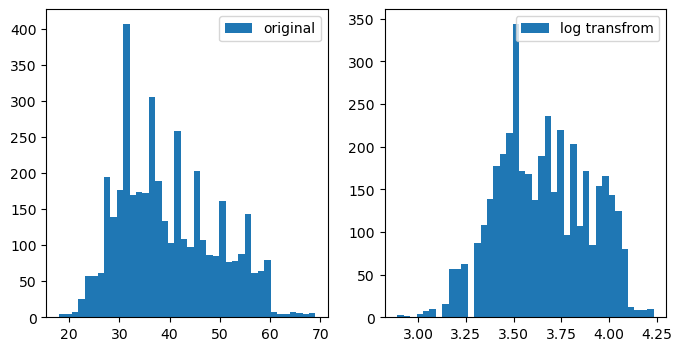

In [42]:

plt.figure(figsize=(8,4))

log_data = np.log(df_copy["age"])

plt.subplot(1,2,1).hist(df_copy["age"],bins=40,label="original")
plt.legend()
plt.subplot(1,2,2).hist(log_data,bins=40,label="log transfrom")
plt.legend()
plt.show()


### sqaure root transformtion


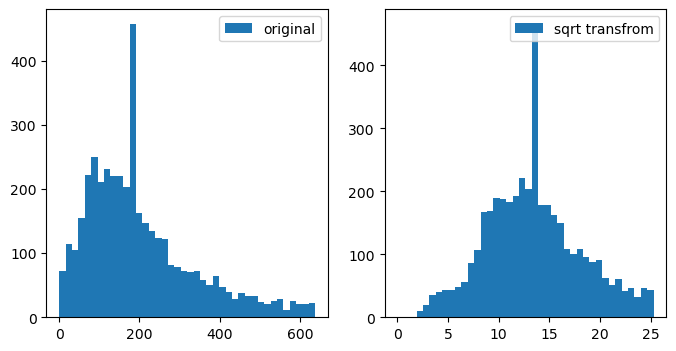

In [43]:

plt.figure(figsize=(8,4))

sqrt_data = np.sqrt(df_copy["duration"])

plt.subplot(1,2,1).hist(df_copy["duration"],bins=40,label="original")
plt.legend()
plt.subplot(1,2,2).hist(sqrt_data,bins=40,label="sqrt transfrom")
plt.legend()
plt.show()


### Observation the sqrt giveing transformation us a great value 


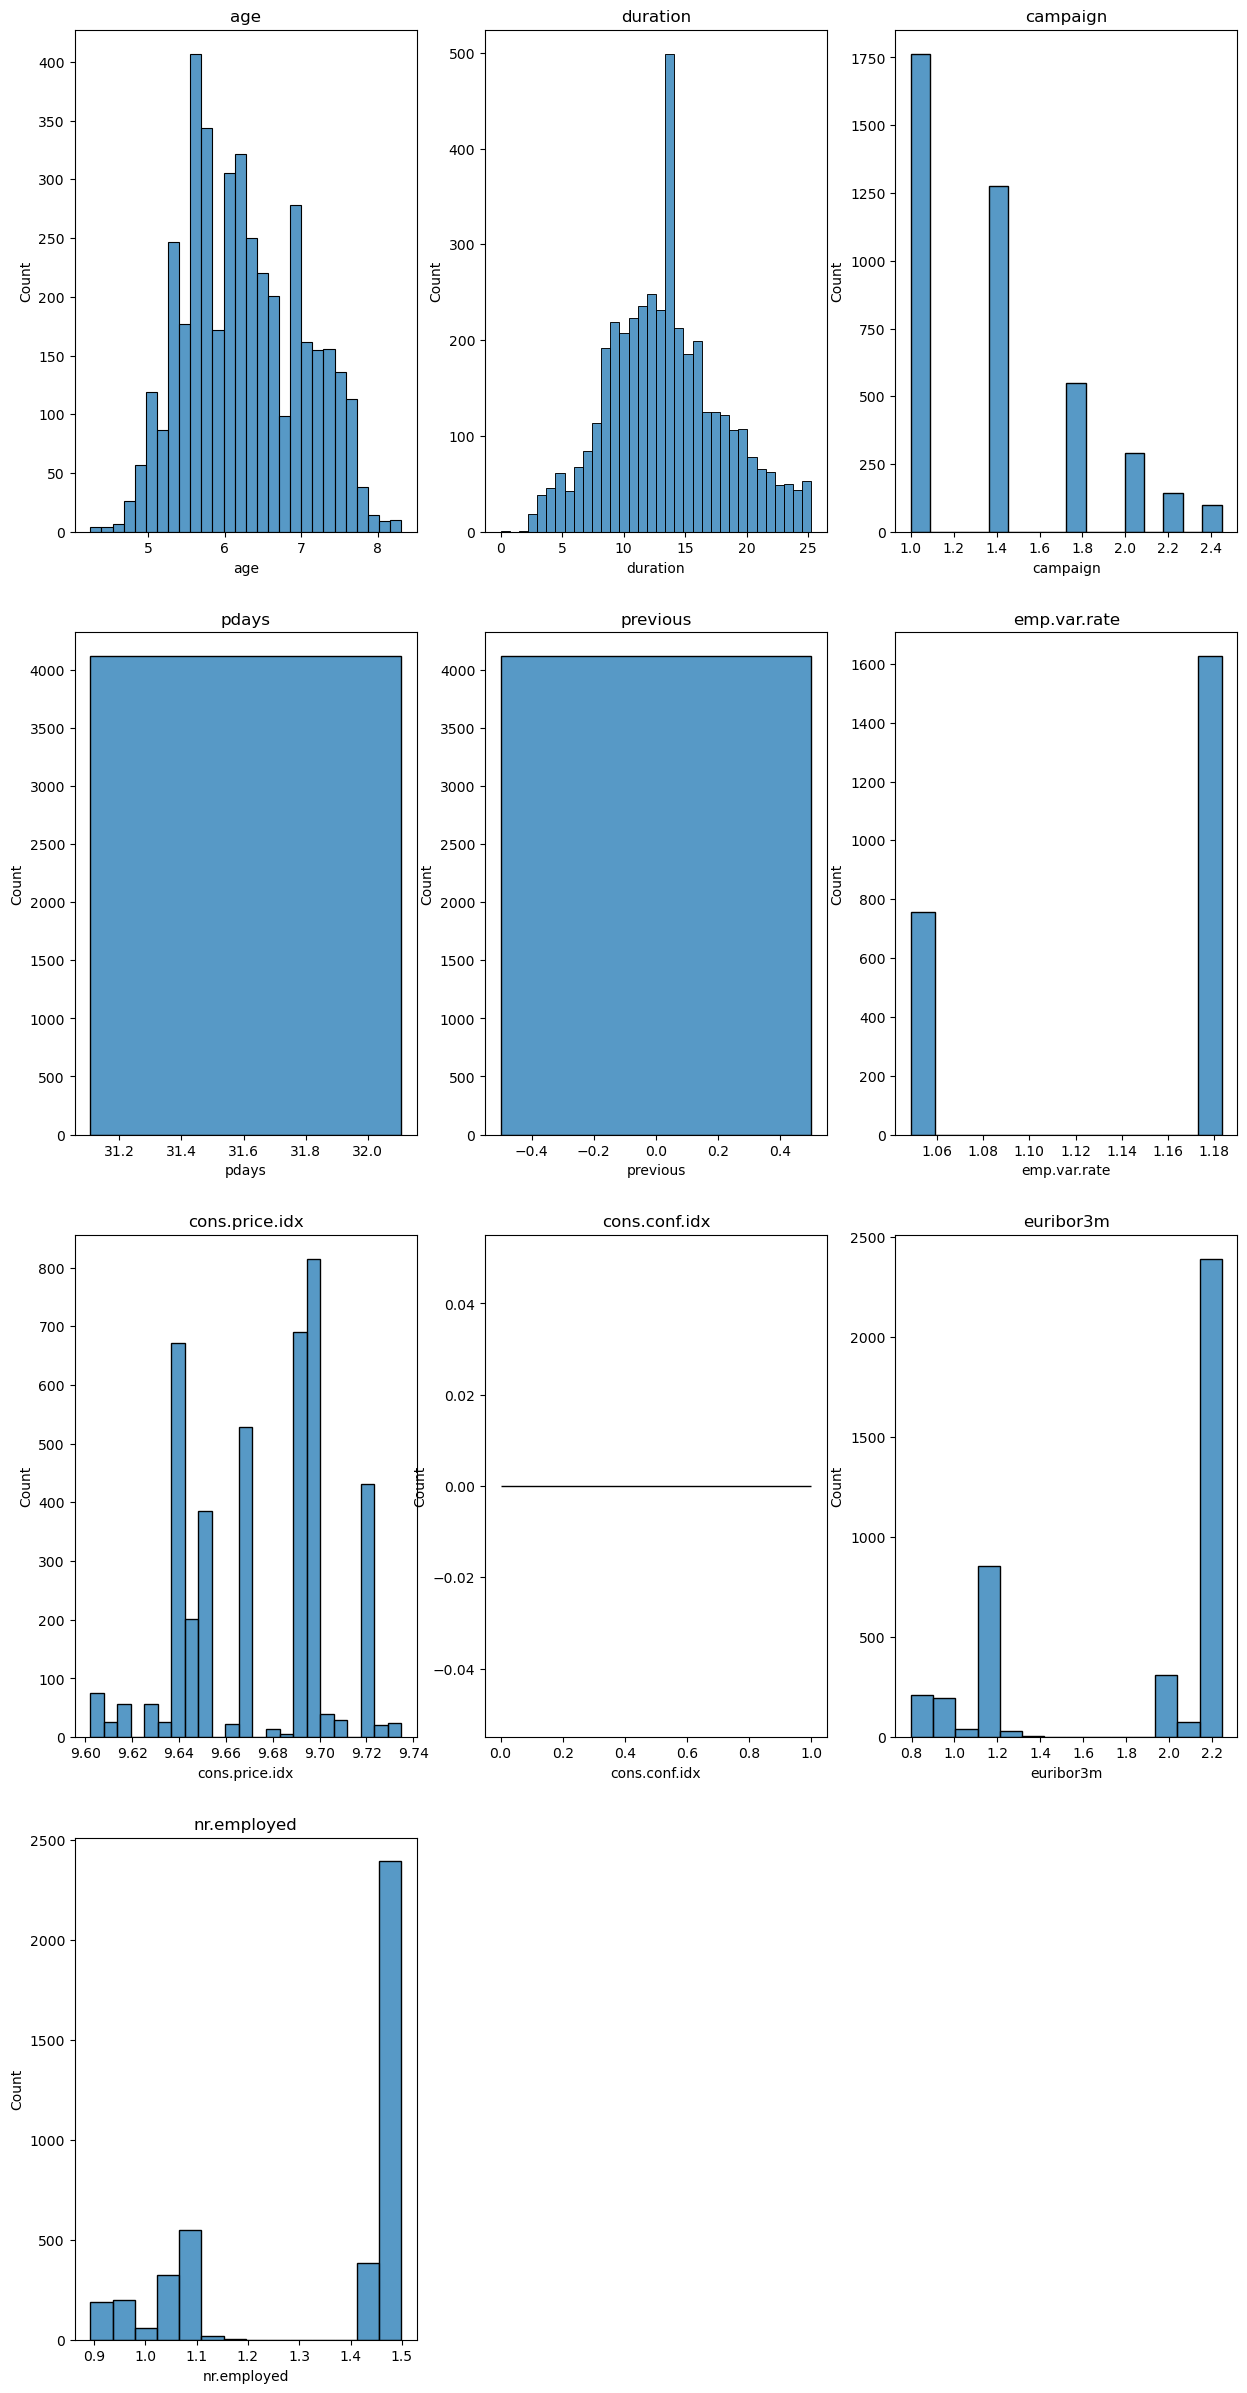

In [44]:
plt.figure(figsize=(15,30))
for index,name  in enumerate(cat_cols,1):
    plt.subplot(4,3,index)
    sqrt_data = np.sqrt( df_copy[name])
    df_copy[names] = sqrt_data
    sns.histplot(sqrt_data)
    plt.title(name)
    
plt.show()

In [47]:
cat_cols

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [49]:
cat_col=['age', 'duration', 'campaign', 'pdays', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

### skewness after sqrt tranformation

In [45]:
for i in num_col:
    original = round(df[i].skew(),2)
    after = round(df_copy[i].skew(),2)
    print(f"Skewnewss original:{original} after SQRT:{after}")

Skewnewss original:0.72 after SQRT:0.44
Skewnewss original:3.29 after SQRT:1.1
Skewnewss original:4.0 after SQRT:1.33
Skewnewss original:-4.78 after SQRT:0.0
Skewnewss original:4.02 after SQRT:0.0
Skewnewss original:-0.73 after SQRT:-0.73
Skewnewss original:-0.22 after SQRT:-0.22
Skewnewss original:0.29 after SQRT:0.13
Skewnewss original:-0.72 after SQRT:-0.72
Skewnewss original:-1.08 after SQRT:-0.82


### Power PowerTransformer

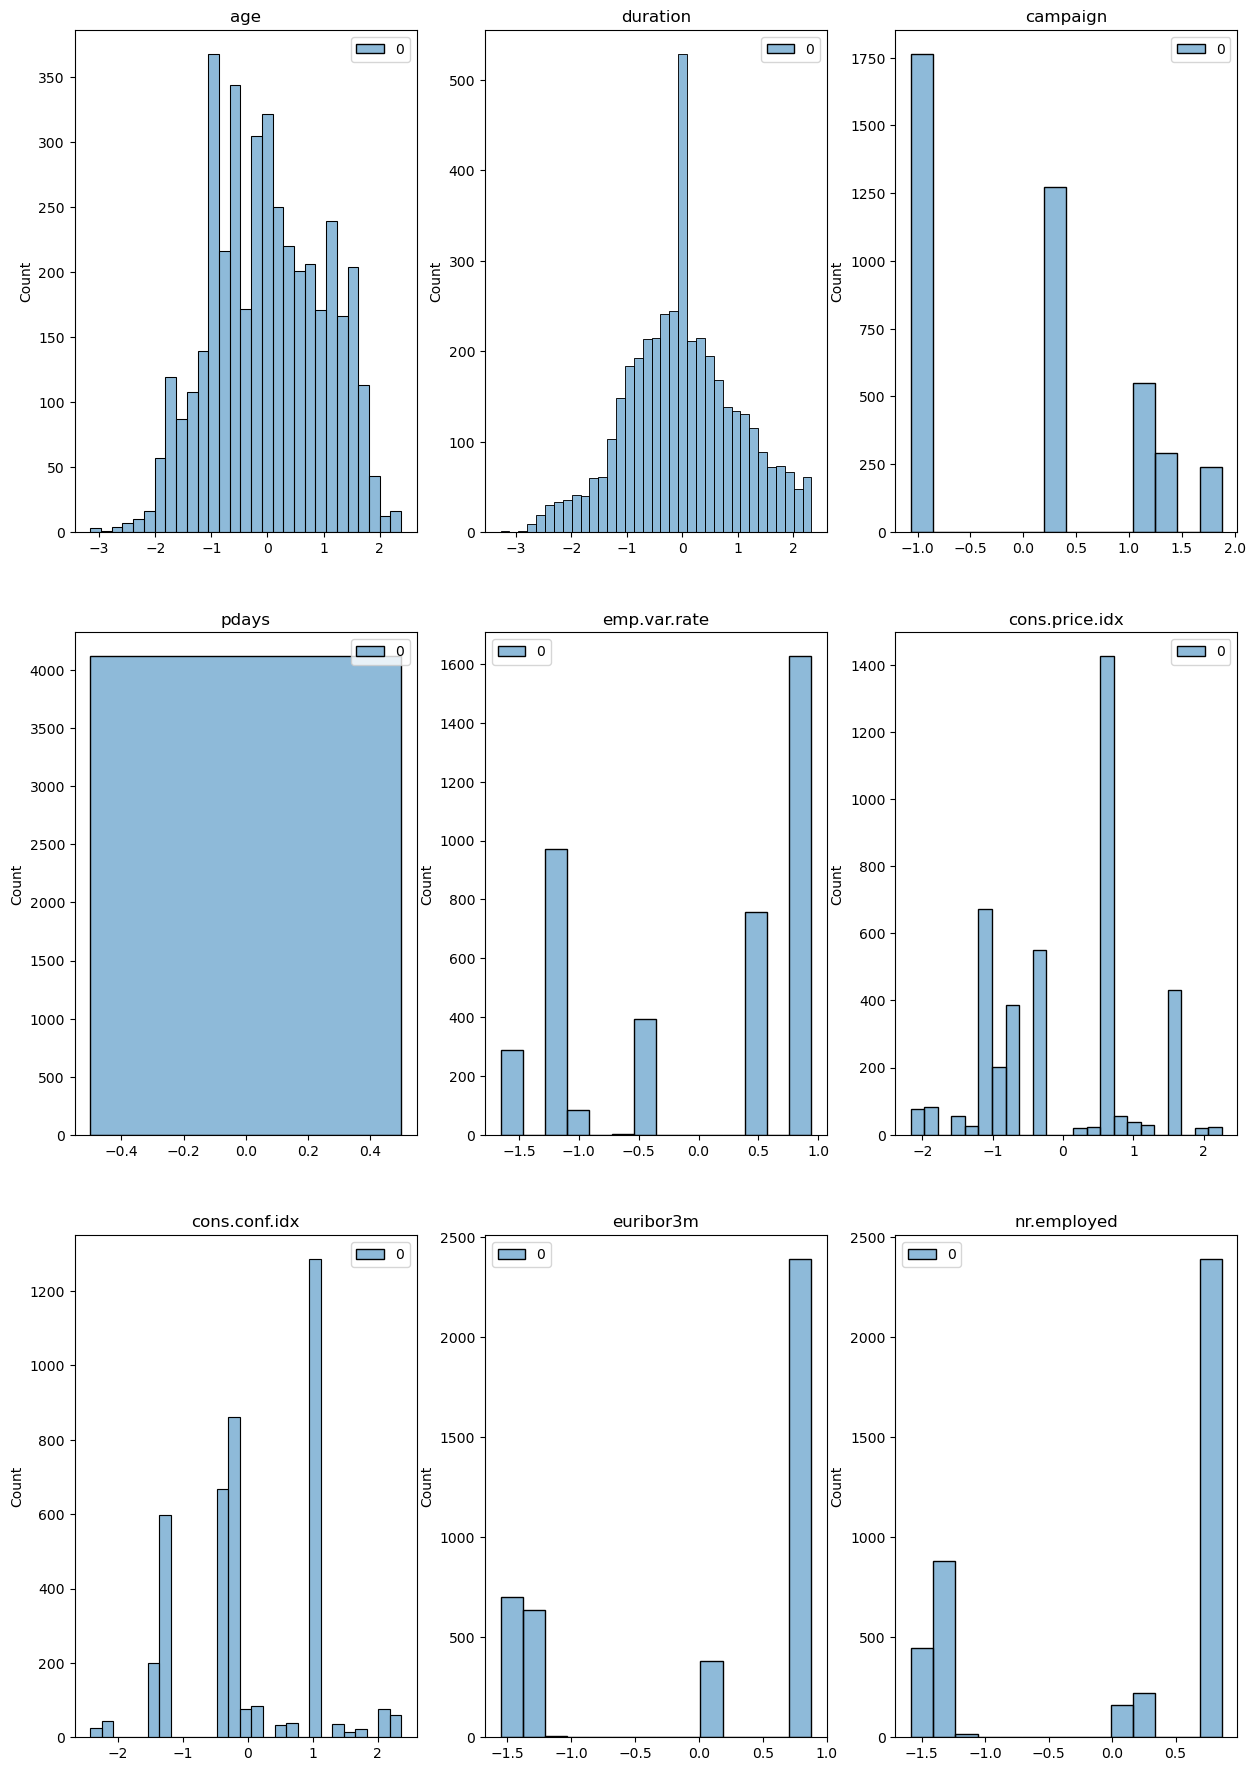

In [50]:
from sklearn.preprocessing import PowerTransformer

plt.figure(figsize=(15,30))
for i ,j in enumerate(cat_col,1):
    plt.subplot(4,3,i)
    pe = PowerTransformer(method="yeo-johnson",standardize=True)
    yeo_tranform = pe.fit_transform(df_copy[[j]])
    df[j] = yeo_tranform
    sns.histplot(yeo_tranform)
    plt.title(j)

plt.show()



In [70]:
cat_col=['age', 'duration', 'campaign', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

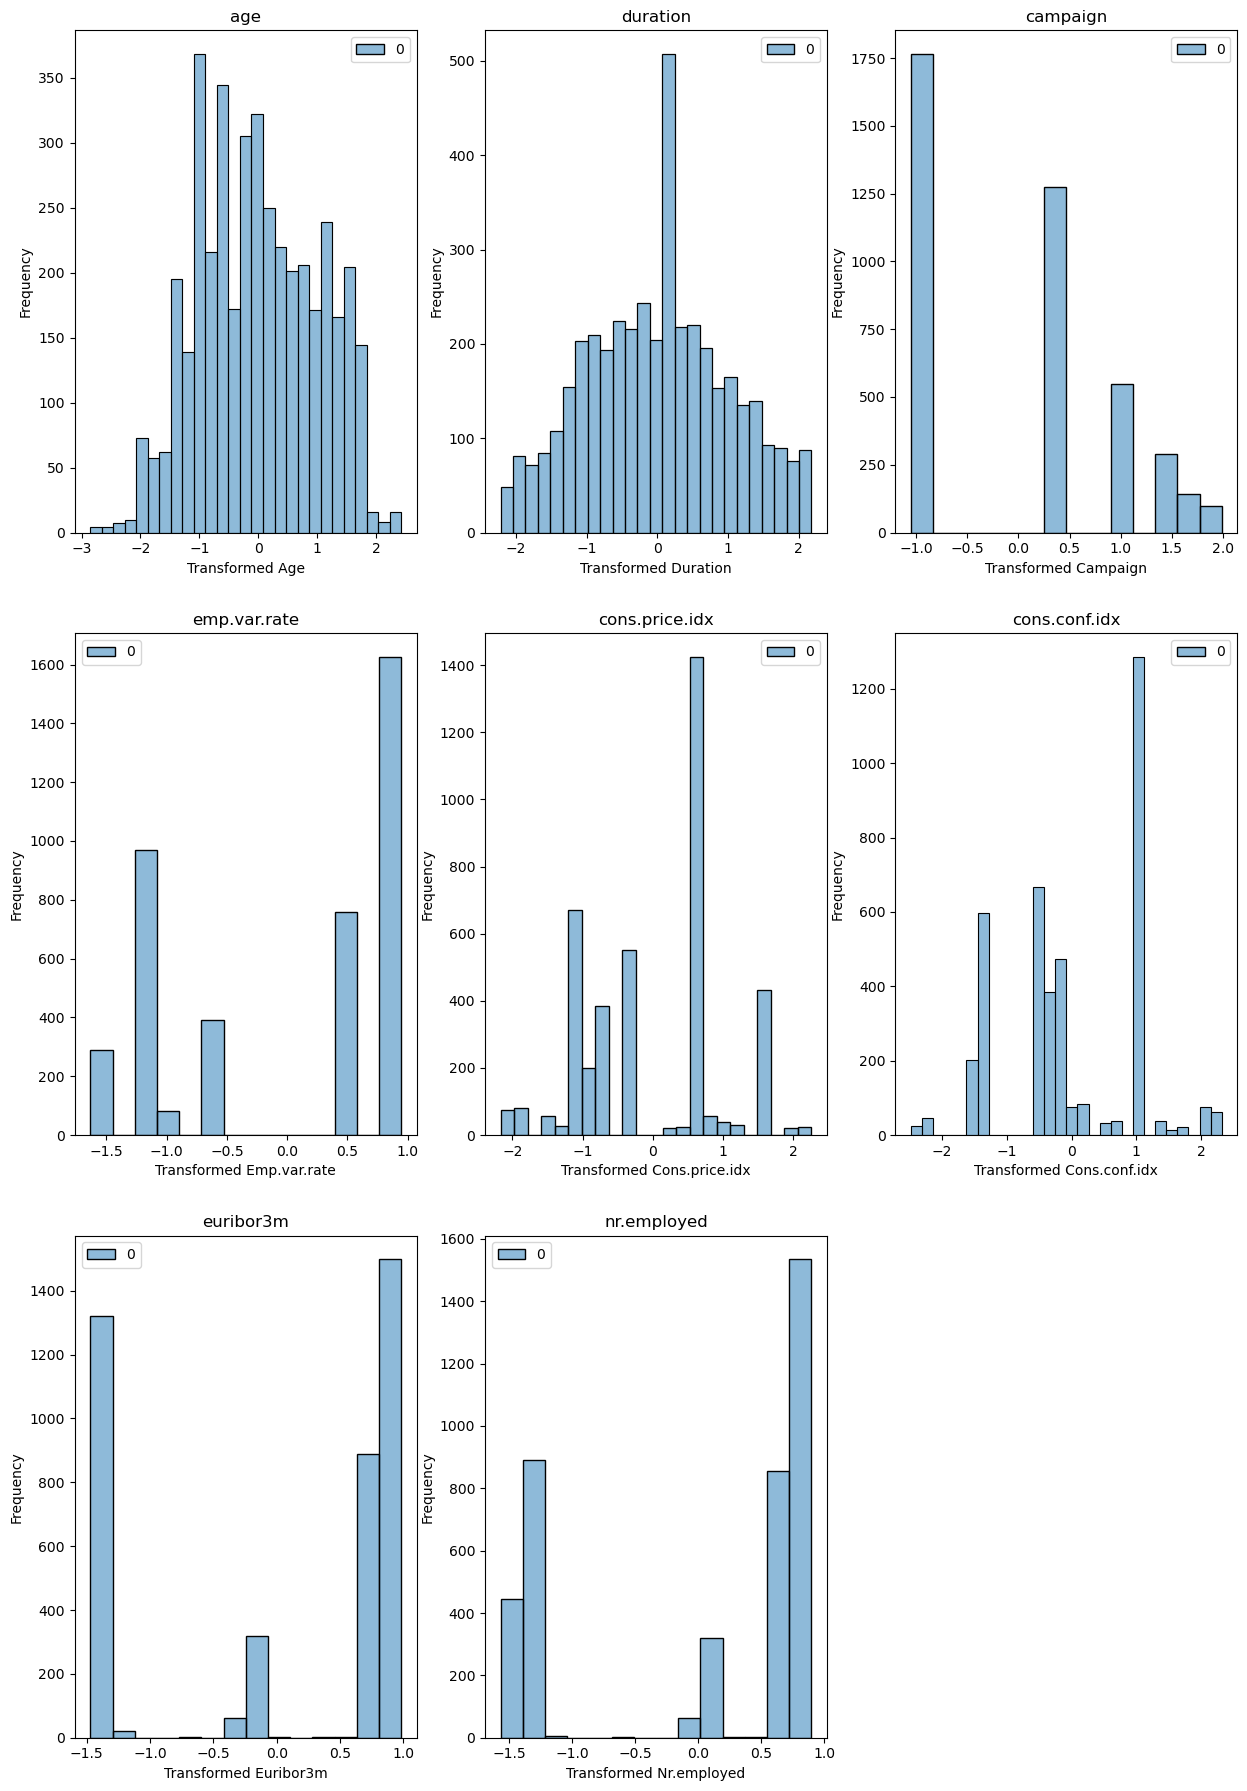

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer

plt.figure(figsize=(15,30))
for i, j in enumerate(cat_col, 1):
    plt.subplot(4, 3, i)
    # Use 'yeo-johnson' method if the column contains non-positive values
    method = "box-cox" if (df_copy[j] > 0).all() else "yeo-johnson"
    pe = PowerTransformer(method=method, standardize=True)
    boxcox_transform = pe.fit_transform(df_copy[[j]])
    df[j] = boxcox_transform
    sns.histplot(boxcox_transform)
    plt.xlabel(f'Transformed {j.capitalize()}')
    plt.ylabel('Frequency')
    plt.title(j)

plt.show()


### skewness after power transform (yeo jhonson)

In [52]:
for i in num_col:
    original = round(df[i].skew(),2)
    after = round(df_copy[i].skew(),2)
    print(f"Skewnewss original {i}: {original} after PwrT: {after}")

Skewnewss original age: 0.0 after PwrT: 0.44
Skewnewss original duration: -0.01 after PwrT: 1.1
Skewnewss original campaign: 0.19 after PwrT: 1.33
Skewnewss original pdays: 0.0 after PwrT: 0.0
Skewnewss original previous: 4.02 after PwrT: 0.0
Skewnewss original emp.var.rate: -0.41 after PwrT: -0.73
Skewnewss original cons.price.idx: -0.04 after PwrT: -0.22
Skewnewss original cons.conf.idx: 0.04 after PwrT: 0.13
Skewnewss original euribor3m: -0.65 after PwrT: -0.72
Skewnewss original nr.employed: -0.67 after PwrT: -0.82


In [ ]:
# ## skewnewss after median value 
# Skewnewss original:0.72 after:0.44
# Skewnewss original:3.29 after:1.1
# Skewnewss original:4.0 after:1.33
# Skewnewss original:-4.78 after:0
# Skewnewss original:4.02 after:0
# Skewnewss original:-0.73 after:-0.73
# Skewnewss original:-0.22 after:-0.22
# Skewnewss original:0.29 after:0.13
# Skewnewss original:-0.72 after:-0.72
# Skewnewss original:-1.08 after:-1.08

###### OBS there is no mejaor changes in sqrt transformation and power tranformation

### Correlation 

In [53]:
df_copy.columns


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [54]:
df_copy.corr(numeric_only=True)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.012462,0.003323,NaN,NaN,0.033629,0.016258,0.080307,0.043393,0.040003
duration,0.012462,1.000000,-0.074455,NaN,NaN,-0.057703,-0.000819,-0.025261,-0.070404,-0.072110
campaign,0.003323,-0.074455,1.000000,NaN,NaN,0.119153,0.100088,0.001817,0.103290,0.101019
pdays,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
previous,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp.var.rate,0.033629,-0.057703,0.119153,NaN,NaN,1.000000,0.755155,0.283860,0.970308,0.960732
cons.price.idx,0.016258,-0.000819,0.100088,NaN,NaN,0.755155,1.000000,0.118548,0.657159,0.630314
cons.conf.idx,0.080307,-0.025261,0.001817,NaN,NaN,0.283860,0.118548,1.000000,0.349398,0.292348
euribor3m,0.043393,-0.070404,0.103290,NaN,NaN,0.970308,0.657159,0.349398,1.000000,0.995458
nr.employed,0.040003,-0.072110,0.101019,NaN,NaN,0.960732,0.630314,0.292348,0.995458,1.000000


<Axes: >

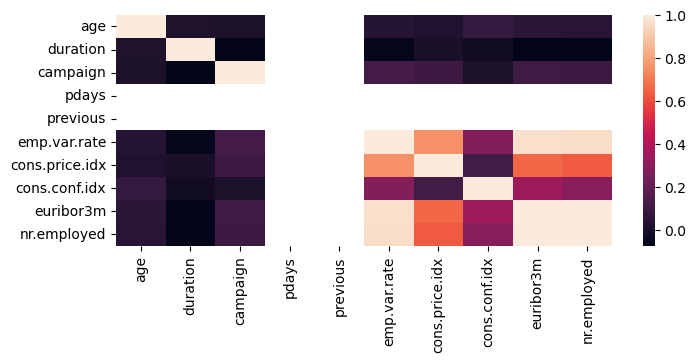

In [55]:
df_data = df_copy.corr(numeric_only=True)
plt.figure(figsize=(8,3))
sns.heatmap(df_data)

### Transformation Catagorical to Numerical


In [56]:
cat_cols = df_copy.select_dtypes("object").columns
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [57]:
for i in cat_cols:
    print(i,df_copy[i].unique())


job ['blue-collar' 'services' 'admin.' 'entrepreneur' 'self-employed'
 'technician' 'management' 'student' 'retired' 'housemaid' 'unemployed'
 'unknown']
marital ['married' 'single' 'divorced' 'unknown']
education ['basic.9y' 'high.school' 'university.degree' 'professional.course'
 'basic.6y' 'basic.4y' 'unknown' 'illiterate']
default ['no' 'unknown' 'yes']
housing ['yes' 'no' 'unknown']
loan ['no' 'unknown' 'yes']
contact ['cellular' 'telephone']
month ['may' 'jun' 'nov' 'sep' 'jul' 'aug' 'mar' 'oct' 'apr' 'dec']
day_of_week ['fri' 'wed' 'mon' 'thu' 'tue']
poutcome ['nonexistent' 'failure' 'success']
y ['no' 'yes']


### Encodeing

#### We should devide catagorcial columns to odianl and nomial by kits neature 

In [59]:
nominal = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'poutcome']
odinal =  ['education', 'month', 'day_of_week', 'y']


In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in odinal:
   df_copy[i] =  le.fit_transform(df_copy[i])
df_copy

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30.0,blue-collar,married,2,no,yes,no,cellular,6,0,...,2.0,999.0,0.0,nonexistent,-1.8,92.893,-46.2,1.313,1.070449,0
1,39.0,services,single,3,no,no,no,telephone,6,0,...,4.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.855,1.484388,0
2,25.0,services,married,3,no,yes,no,telephone,4,4,...,1.0,999.0,0.0,nonexistent,1.4,94.465,-41.8,4.962,1.492499,0
3,38.0,services,married,2,no,unknown,unknown,telephone,4,0,...,3.0,999.0,0.0,nonexistent,1.4,94.465,-41.8,4.959,1.492274,0
4,47.0,admin.,married,6,no,yes,no,cellular,7,1,...,1.0,999.0,0.0,nonexistent,-0.1,93.200,-42.0,4.191,1.430802,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30.0,admin.,married,1,no,yes,yes,cellular,3,2,...,1.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.958,1.492199,0
4115,39.0,admin.,married,3,no,yes,no,telephone,3,0,...,1.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.959,1.492274,0
4116,27.0,student,single,3,no,no,no,cellular,6,1,...,2.0,999.0,0.0,failure,-1.8,92.893,-46.2,1.354,1.078710,0
4117,58.0,admin.,married,3,no,no,no,cellular,1,0,...,1.0,999.0,0.0,nonexistent,1.4,93.444,-36.1,4.966,1.492800,0


In [61]:
df_copy = pd.get_dummies(df_copy,columns=nominal,dtype=int)
df_copy

,age,education,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30.0,2,6,0,487.0,2.0,999.0,0.0,-1.8,92.893,...,0,1,1,0,0,1,0,0,1,0
1,39.0,3,6,0,346.0,4.0,999.0,0.0,1.1,93.994,...,0,0,1,0,0,0,1,0,1,0
2,25.0,3,4,4,227.0,1.0,999.0,0.0,1.4,94.465,...,0,1,1,0,0,0,1,0,1,0
3,38.0,2,4,0,17.0,3.0,999.0,0.0,1.4,94.465,...,1,0,0,1,0,0,1,0,1,0
4,47.0,6,7,1,58.0,1.0,999.0,0.0,-0.1,93.200,...,0,1,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30.0,1,3,2,53.0,1.0,999.0,0.0,1.4,93.918,...,0,1,0,0,1,1,0,0,1,0
4115,39.0,3,3,0,219.0,1.0,999.0,0.0,1.4,93.918,...,0,1,1,0,0,0,1,0,1,0
4116,27.0,3,6,1,64.0,2.0,999.0,0.0,-1.8,92.893,...,0,0,1,0,0,1,0,1,0,0
4117,58.0,3,1,0,528.0,1.0,999.0,0.0,1.4,93.444,...,0,0,1,0,0,1,0,0,1,0


In [62]:
all_cols = df_copy.columns
all_cols

Index(['age', 'education', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'default_no', 'default_unknown',
       'default_yes', 'housing_no', 'housing_unknown', 'housing_yes',
       'loan_no', 'loan_unknown', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success'],
      dtype='object')

### Scaling methods


In [63]:
#### Standarziation 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
for i in all_cols:
    sc_data = sc.fit_transform(df_copy[[i]])
    df_copy[i] = sc_data
df_copy

,age,education,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,-1.009003,-0.828300,0.739737,-1.446809,2.109066,-0.037013,0.0,0.0,-1.206054,-1.185448,...,-0.161736,0.945406,0.479499,-0.161736,-0.438783,0.743752,-0.743752,-0.351958,0.411308,-0.188958
1,-0.077285,-0.363038,0.739737,-1.446809,1.065696,1.576278,0.0,0.0,0.649441,0.715193,...,-0.161736,-1.057746,0.479499,-0.161736,-0.438783,-1.344534,1.344534,-0.351958,0.411308,-0.188958
2,-1.526624,-0.363038,-0.127977,1.432827,0.185122,-0.843659,0.0,0.0,0.841389,1.528273,...,-0.161736,0.945406,0.479499,-0.161736,-0.438783,-1.344534,1.344534,-0.351958,0.411308,-0.188958
3,-0.180809,-0.828300,-0.127977,-1.446809,-1.368832,0.769633,0.0,0.0,0.841389,1.528273,...,6.182926,-1.057746,-2.085510,6.182926,-0.438783,-1.344534,1.344534,-0.351958,0.411308,-0.188958
4,0.750909,1.032748,1.173594,-0.726900,-1.065441,-0.843659,0.0,0.0,-0.118350,-0.655478,...,-0.161736,0.945406,0.479499,-0.161736,-0.438783,0.743752,-0.743752,-0.351958,0.411308,-0.188958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,-1.009003,-1.293561,-0.561833,-0.006991,-1.102440,-0.843659,0.0,0.0,0.841389,0.583995,...,-0.161736,0.945406,-2.085510,-0.161736,2.279032,0.743752,-0.743752,-0.351958,0.411308,-0.188958
4115,-0.077285,-0.363038,-0.561833,-1.446809,0.125924,-0.843659,0.0,0.0,0.841389,0.583995,...,-0.161736,0.945406,0.479499,-0.161736,-0.438783,-1.344534,1.344534,-0.351958,0.411308,-0.188958
4116,-1.319575,-0.363038,0.739737,-0.726900,-1.021043,-0.037013,0.0,0.0,-1.206054,-1.185448,...,-0.161736,-1.057746,0.479499,-0.161736,-0.438783,0.743752,-0.743752,2.841247,-2.431270,-0.188958
4117,1.889675,-0.363038,-1.429547,-1.446809,2.412457,-0.843659,0.0,0.0,0.841389,-0.234264,...,-0.161736,-1.057746,0.479499,-0.161736,-0.438783,0.743752,-0.743752,-0.351958,0.411308,-0.188958
